In [1]:
# %% Import libraries

import json, os, matplotlib
import matplotlib.pyplot as plt
import numpy as np

# plot formatting 
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'font.family': 'Arial'})
# editable text in illustrator
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['xtick.bottom'] = False
matplotlib.rcParams['ytick.left'] = False

First, we define the frequency bands of interest.

In [2]:
freq_bands = [
    [5, 10e3], # HB Tx
    [500, 3000], # LB Tx
    [0, 1000], # 2kHz data 
    [300, 1000], # SBP 
    [150, 450], # HF LFP 
    [100, 200], 
    [50, 100],
    [25, 50], 
    [0, 25],
]

Next, we define a function that computes the amplifier power given the signal bandwidth using the Noise Efficiency Factor (NEF) formula.

In [3]:
def amp_power(bandwidth=0): 
    '''
    Inputs
        bandwidth: float
            bandwidth of the signal in Hz
    
    Returns 
        power: float
            amplifier power in W
    '''
    NEF = 4.0
    Vrms = 2e-6 #V
    Ut =  26.7*1e-3 #V
    k = 1.38e-23
    T = 310
    V = 3.3 # V 

    I = (NEF/Vrms) ** 2 * ((np.pi * Ut * 4 * k * T * bandwidth) / 2)

    return V * I 

We compute the amplifier power for each frequency band of interest, convert it to mW, and plot. This figure replicates Figure 1b.

In [4]:
#%% 
amp_powers = [] # mW
for fb in freq_bands: 
    bandwidth = fb[1] - fb[0]
    amp_powers.append(amp_power(bandwidth=bandwidth) * 1e3)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


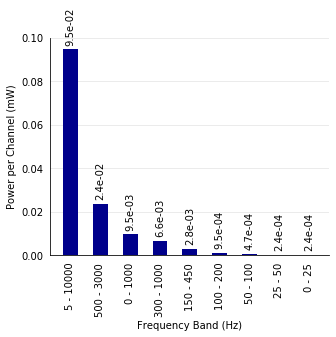

In [5]:
# %%

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
bar_width = 0.5
index = np.arange(len(freq_bands))
ax.bar(index, amp_powers, np.array(bar_width), color='darkblue', zorder=1000)

ax.set_xlabel('Frequency Band (Hz)')
ax.set_ylabel('Power per Channel (mW)')

for i in range(len(amp_powers)):
    ax.text(index[i], amp_powers[i] + 0.002, '{:.1e}'.format(amp_powers[i]), ha='center', va='bottom', rotation=90)

ax.set_xticks(index)
ax.set_xticklabels(
    [f'{int(fb[0])} - {int(fb[1])}' for fb in freq_bands], rotation=90
)

ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=True, labelright=False)

ax.grid(axis='y', alpha=0.3, zorder=-1)

ax.set_yticks([0, 0.02, 0.04, 0.06, 0.08, 0.1])

Next we define a function that computes the ADC power by solving the Schreier Figure of Merit (FoMs) given the sampling bandwidth.

In [7]:
def adc_power(bandwidth = 0):
    '''
    Inputs
        bandwidth: float
            sampling bandwidth (half of the sampling rate) in Hz
    
    Returns 
        power: float
            ADC power in W
    '''
    SNDR = 96 #dB
    FoMS = 185 #dB

    denom = 10 ** ((FoMS - SNDR)/10.)
    return bandwidth/denom 

We compute the ADC power for each frequency band of interest, convert it to mW, and plot. This figure replicates Figure 1c.

In [8]:
adc_powers = [] # mW
for fb in freq_bands: 
    bandwidth = fb[1]
    adc_powers.append(adc_power(bandwidth=bandwidth) * 1e3)

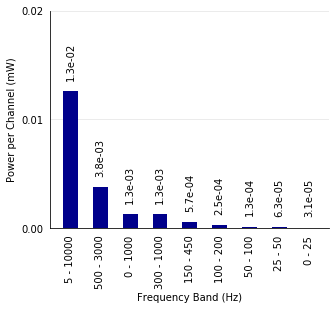

In [9]:
# %%

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
bar_width = 0.5
index = np.arange(len(freq_bands))
ax.bar(index, adc_powers, np.array(bar_width), color='darkblue', zorder=1000)

ax.set_xlabel('Frequency Band (Hz)')
ax.set_ylabel('Power per Channel (mW)')

for i in range(len(adc_powers)):
    ax.text(index[i], adc_powers[i] + 0.001, '{:.1e}'.format(adc_powers[i]), ha='center', va='bottom', rotation=90)

ax.set_xticks(index)
ax.set_xticklabels(
    [f'{int(fb[0])} - {int(fb[1])}' for fb in freq_bands], rotation=90
)

ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=True, labelright=False)

ax.grid(axis='y', alpha=0.3, zorder=-1)

ax.set_yticks([0, 0.01, 0.02])